<a href="https://colab.research.google.com/github/Jael12Hephzibah/DataScience/blob/main/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
import os


In [26]:
import seaborn as sns

def plotScatterMatrix(df, graphWidth, graphHeight):
    sns.set(style="ticks")
    sns.pairplot(df)
    plt.gcf().set_size_inches(graphWidth, graphHeight)
    plt.show()


In [14]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [21]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int(np.ceil(nCol / nGraphPerRow))  # Ensure nGraphRow is an integer
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


In [22]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
    corr = numeric_df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [23]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# menu.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('menu.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'menu.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 260 rows and 24 columns


In [19]:
print(df1.columns)


Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')


In [28]:
df1.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [17]:
# Exclude non-numeric columns from the dataframe
numeric_df = df1.select_dtypes(include=np.number)

# Calculate descriptive statistics
mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]
std_values = numeric_df.std()

# Print descriptive statistics
print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)
print("\nStandard Deviation:\n", std_values)


Mean:
 Calories                         368.269231
Calories from Fat                127.096154
Total Fat                         14.165385
Total Fat (% Daily Value)         21.815385
Saturated Fat                      6.007692
Saturated Fat (% Daily Value)     29.965385
Trans Fat                          0.203846
Cholesterol                       54.942308
Cholesterol (% Daily Value)       18.392308
Sodium                           495.750000
Sodium (% Daily Value)            20.676923
Carbohydrates                     47.346154
Carbohydrates (% Daily Value)     15.780769
Dietary Fiber                      1.630769
Dietary Fiber (% Daily Value)      6.530769
Sugars                            29.423077
Protein                           13.338462
Vitamin A (% Daily Value)         13.426923
Vitamin C (% Daily Value)          8.534615
Calcium (% Daily Value)           20.973077
Iron (% Daily Value)               7.734615
dtype: float64

Median:
 Calories                         340.0
Calor

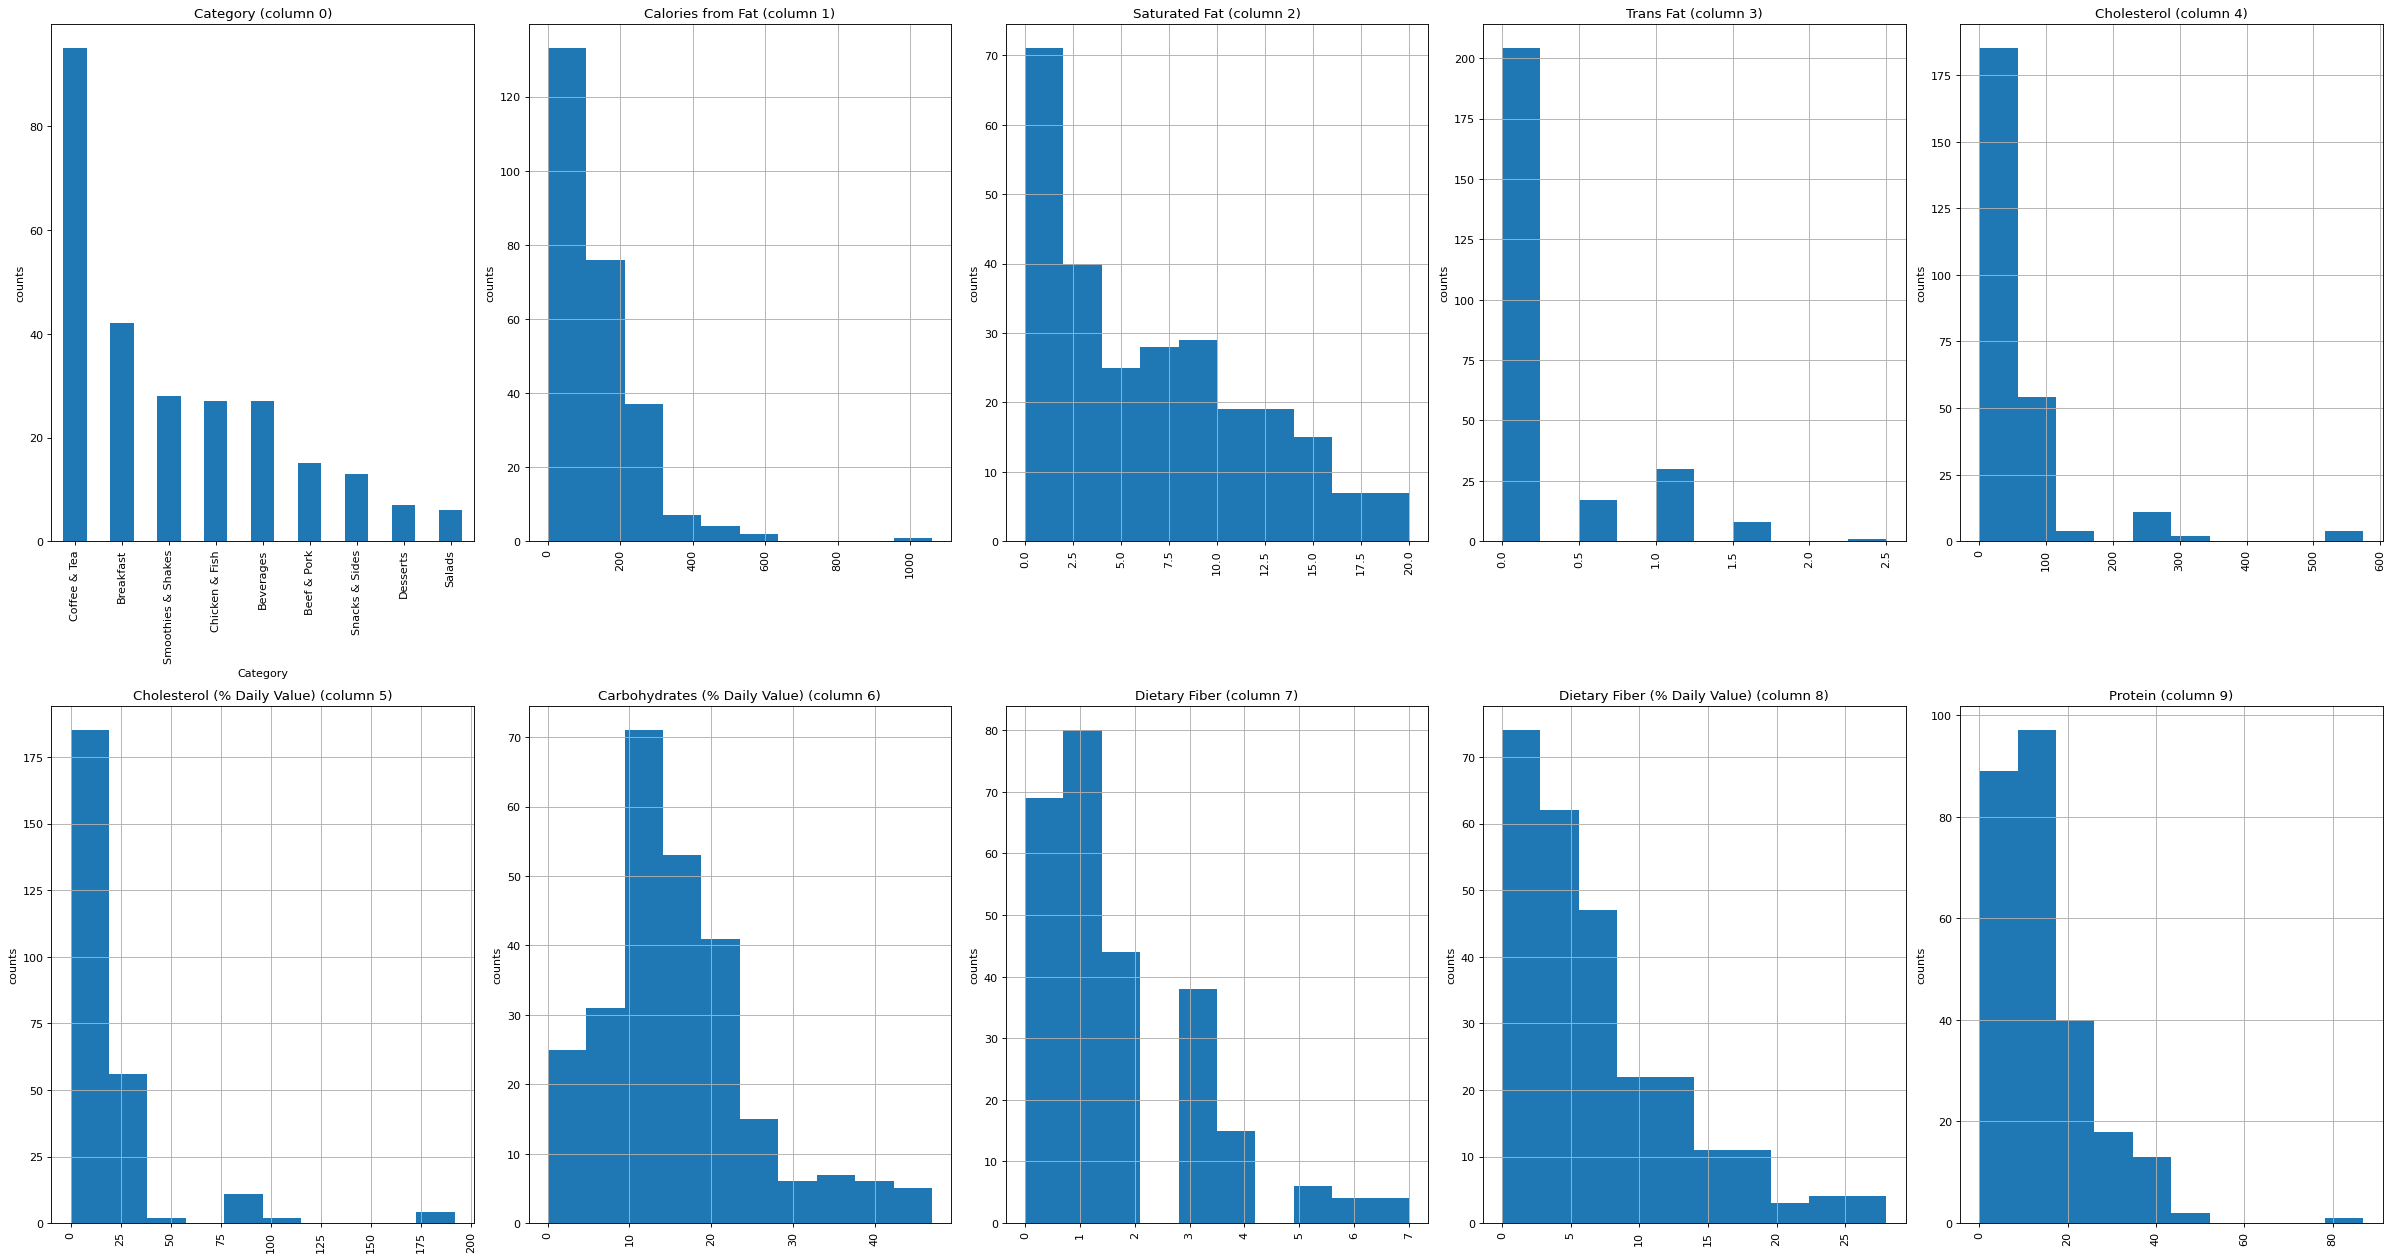

In [24]:
plotPerColumnDistribution(df1, 10, 5)

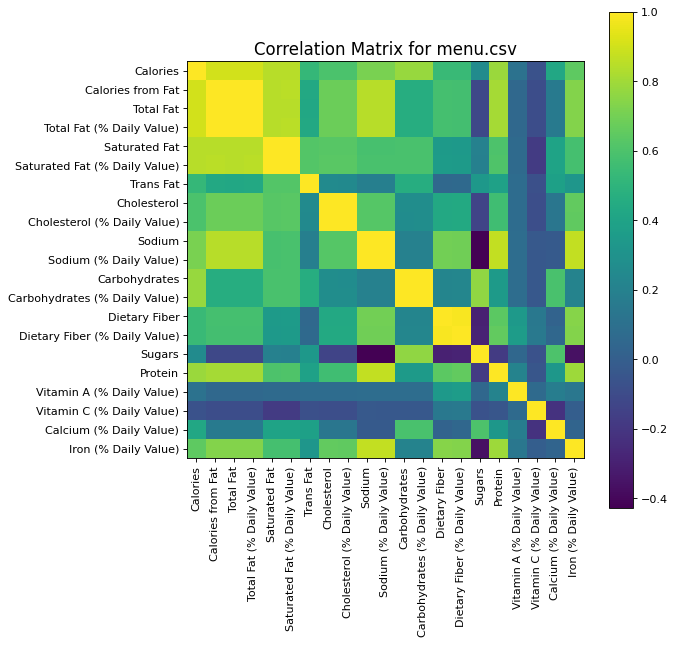

In [25]:
plotCorrelationMatrix(df1, 8)

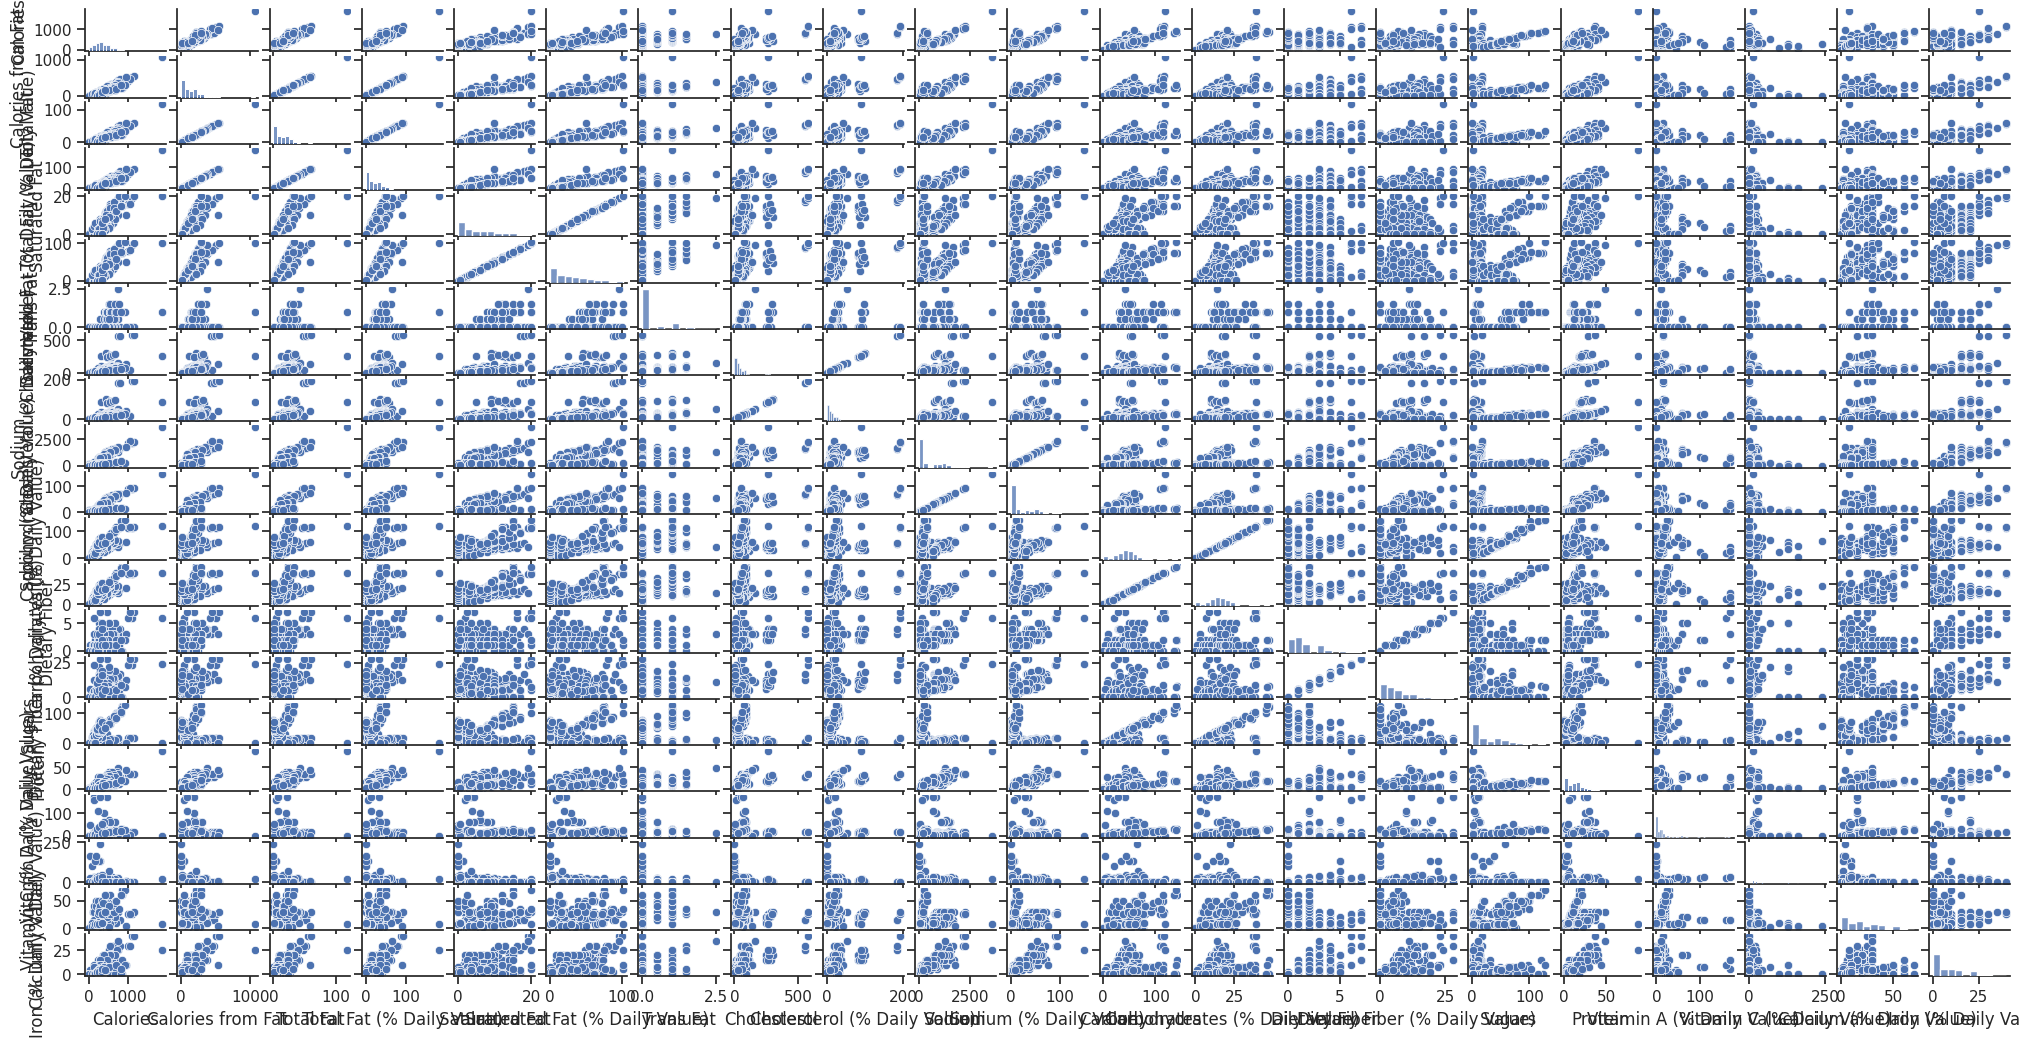

In [27]:
plotScatterMatrix(df1, 20, 10)